<a href="https://colab.research.google.com/github/jdgargiulo/Lectures/blob/main/Script_de_evaluaci%C3%B3n_de_ciclones_V_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script para evaluar la eficiencia de un ciclón siguiendo la tería de Leith y Licht, desarrollada en "Diseño Óptimo de Ciclones" de  Echeverri Londoño, 2006. 

Autor: cátedra Tratamiento de Efluentes Gaseosos, FcEx, UNCPBA, 2023


---




**TUTORIAL:**

*   IMPORTANTE!! antes de modificar algo, guarden una copia en su drive y trabajen sobre su copia
* ARCHIVO->GUARDAR COPIA EN DRIVE


*   Editar los parámetros y ejecutar cada celda de código (click en símbolo de play que aparece cuando se posicionan sobre el código)

*   Revisar ecuaciones, puede que halla cometido errores de tipeo

*   Prestar atención a unidades

*   Revisar los valores de velocidad de saltación


# Parámetros iniciales

In [114]:
rop<-2000                              # densidad de partículas [kg/m3]
Dparticulas<-seq(1,30,1)              # diametro particulas [micrones]
Dp<-Dparticulas*0.000001              # diámetro de particlas [m]
flow<-seq(16.7,167,30)                # Caudal entrada [l/m]
Q<-flow*0.0000167                    # caudal entrada [m3/s]
Dp;flow
length(flow)

[1] 1.0e-06 2.0e-06 3.0e-06 4.0e-06 5.0e-06 6.0e-06 7.0e-06 8.0e-06 9.0e-06
[10] 1.0e-05 1.1e-05 1.2e-05 1.3e-05 1.4e-05 1.5e-05 1.6e-05 1.7e-05 1.8e-05
[19] 1.9e-05 2.0e-05 2.1e-05 2.2e-05 2.3e-05 2.4e-05 2.5e-05 2.6e-05 2.7e-05
[28] 2.8e-05 2.9e-05 3.0e-05

[1]  16.7  46.7  76.7 106.7 136.7 166.7

[1] 6

# 1) Definimos los parámetros físicos de diseño (editar dimensiones características)

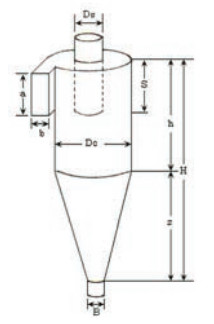

In [2]:
Dc<-0.05  # Diámetro del ciclón [m]

a<-0.5*Dc    # Altura de entrada (0.018m en turbina)
b<-0.25*Dc   # Ancho de entrada  (0.012m en turbina)
S<-0.75*Dc  # Altura de salida
Ds<-0.5*Dc   # Diámetro de salida
h<-2*Dc      # Altura parte cilíndrica
z<-2*Dc      # Altura parte cónica
H<-4*Dc      # Altura total del ciclón
B<-0.2*Dc   # Diámetro de salida partículas
Vi<-Q/(a*b)  # Velocidad de ingreso
N<-(1/a)*(h+z/2)
print(paste("Largo del ciclón [metros]:",H))
print(paste("Velocidad de ingreso[m/s]:",Vi))
print(paste("Número de giros:",N))

[1] "Largo del ciclón [metros]: 0.2"
[1] "Velocidad de ingreso[m/s]: 0.892448" "Velocidad de ingreso[m/s]: 2.495648"
[3] "Velocidad de ingreso[m/s]: 4.098848" "Velocidad de ingreso[m/s]: 5.702048"
[5] "Velocidad de ingreso[m/s]: 7.305248" "Velocidad de ingreso[m/s]: 8.908448"
[1] "Número de giros: 6"


# 2) FACTOR DE CONFIGURACIÓN

In [3]:
# 2.1) Longitud natural del ciclón (L)
L<- 2.9*Ds*(Dc**2/(a*b))**(1/3)
ifelse(L<H-S,print("Long natural correcta"), print("long natural incorrecta"))

# 2.2) Volumen evaluado sobre la salida del ciclón (Vsc)
Vsc<-(pi/4)*(S-a/2)*(Dc**2-Ds**2)

# 2.3) Volumen del ciclón evaluado sobre la long natural (Vr)
Kl<-Dc-(Dc-B)*((S+L-h)/z)
Vr<-(pi/4)*Dc**2*(h-S)+(pi/12)*Dc**2*(L+S-h)*(1+(Kl/Dc)+(Kl/Dc)**2)-(pi/4)*Ds**2*L

# 2.4) Factor de dimensionalidad de proporciones volumétricas (Kc)
Kc<-(Vsc+Vr/2)/(Dc**3)


# 2.5) Factor de Configuración (G)
G<- 8*Kc/((a/Dc*b/Dc)**2)
print(paste("Factor de Configuración:",G))

[1] "Long natural correcta"


[1] "Long natural correcta"

[1] "Factor de Configuración: 417.320120316026"


# 3) TIEMPO DE RELAJACIÓN

In [4]:
Ti<-(rop*Dp**2)/(18*0.0000174)


# 4) EXPONENTE DE VÓRTICE

In [5]:
n<- 1-(1-0.67*Dc**0.14)*(273/283)**0.3
print(paste("Exponente de Vórtice:",n))

[1] "Exponente de Vórtice: 0.446490591700199"


# 5) EFICIENCIA FRACCIONAL
Dos Opciones: Calcular manualmente las eficiencias modificando los argumentos en la función o editar los parámetros iniciales 

In [ ]:

Eficiencia<-function(caudal, diametro){
             Ti<-(rop*diametro**2)/(18*0.0000174)
             1-exp(-2*(G*Ti*caudal*(n+1)/Dc**3)**(0.5/(n+1)))}
 
#Eficiencia(caudal=Q[2], diametro=Dp)

dflist <- lapply(Q, Eficiencia, Dp)
res<-data.frame(Dp,sapply(dflist,c))
colnames(res)<-c("Dp",flow)
res[1]




# D50 en función de Caudal
(Eq. del libro de Wark)

In [106]:

D50<-(9*0.0000174*B/(2*pi*N*Vi*(rop-1.2)))**(1/2)
D50*1000000

[1] 4.825632 2.885719 2.251722 1.909107 1.686662 1.527371

In [ ]:
# con este código exportan la tabla de eficiencia generada
# click derecho en el archivo generado para descargarlo 
#write.csv(res, file="Eficiencia.csv", row.names=FALSE)

# 6) VELOCIDAD DE SALTACIÓN


In [8]:
# 5.1) Velocidad equivalente (W)
W<-(4*9.81*0.0000174*(rop-1)/(3*1**2))**(1/3)

# 5.2 ) Vel de saltación (Vs)
Vs<-4.913*W*(b/Dc)**0.4*Dc**0.067*Vi**(2/3)/(1-b/Dc)**(1/3)
print(paste("Velocidad de saltación[m/s]:",Vs))
ifelse(Vi>1.35*Vs, print("Vel de entrada muy alta"), print("Vel de entrada normal"))

[1] "Velocidad de saltación[m/s]: 1.80962282707055"
[2] "Velocidad de saltación[m/s]: 3.59123423977784"
[3] "Velocidad de saltación[m/s]: 4.99895333637639"
[4] "Velocidad de saltación[m/s]: 6.22946893288489"
[5] "Velocidad de saltación[m/s]: 7.34823301480079"
[6] "Velocidad de saltación[m/s]: 8.38735402996228"
[1] "Vel de entrada normal"


[1] "Vel de entrada normal" "Vel de entrada normal" "Vel de entrada normal"
[4] "Vel de entrada normal" "Vel de entrada normal" "Vel de entrada normal"

# 7) ESTIMACIÓN DE CAIDA DE PRESIÓN (Eq de Shepherd y Lapple)

In [9]:
# 6.1) N de Cabezas de velocidad a la entrada

Nh<-16*(a*b)/(Ds**2)    ## K=16

## 6.2) Caída de presión [Pa]

DeltaP<-0.5*1*Vi**2*Nh
print(paste("Caída de presión [Pa]:",DeltaP))

[1] "Caída de presión [Pa]: 3.1758091264"  
[2] "Caída de presión [Pa]: 24.8211211264" 
[3] "Caída de presión [Pa]: 66.9464331264" 
[4] "Caída de presión [Pa]: 129.5517451264"
[5] "Caída de presión [Pa]: 212.6370571264"
[6] "Caída de presión [Pa]: 316.2023691264"


# **RESUMEN:**

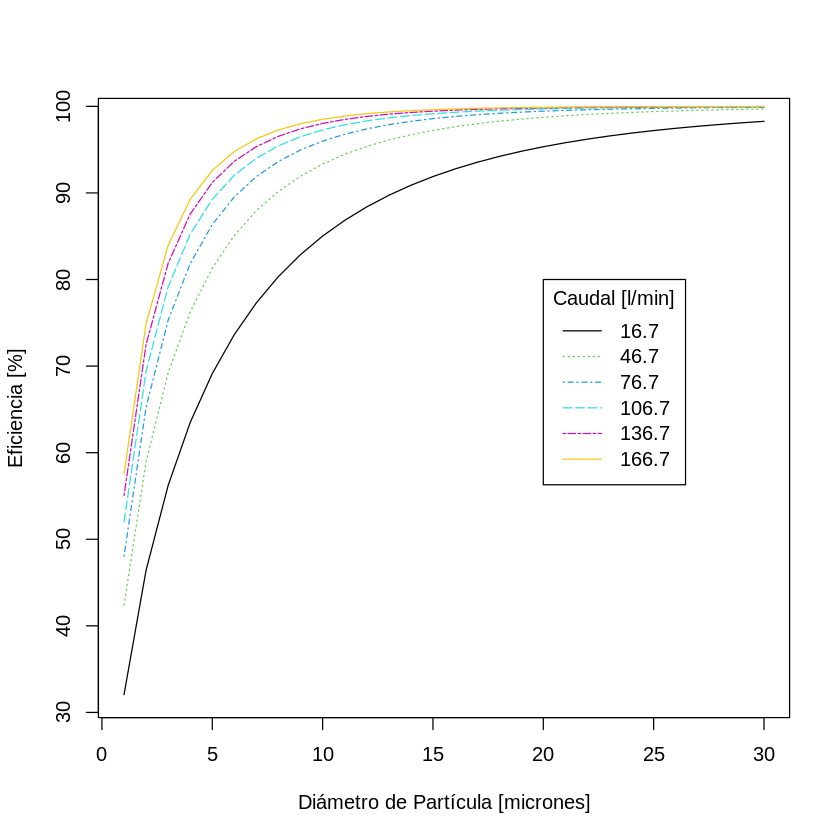

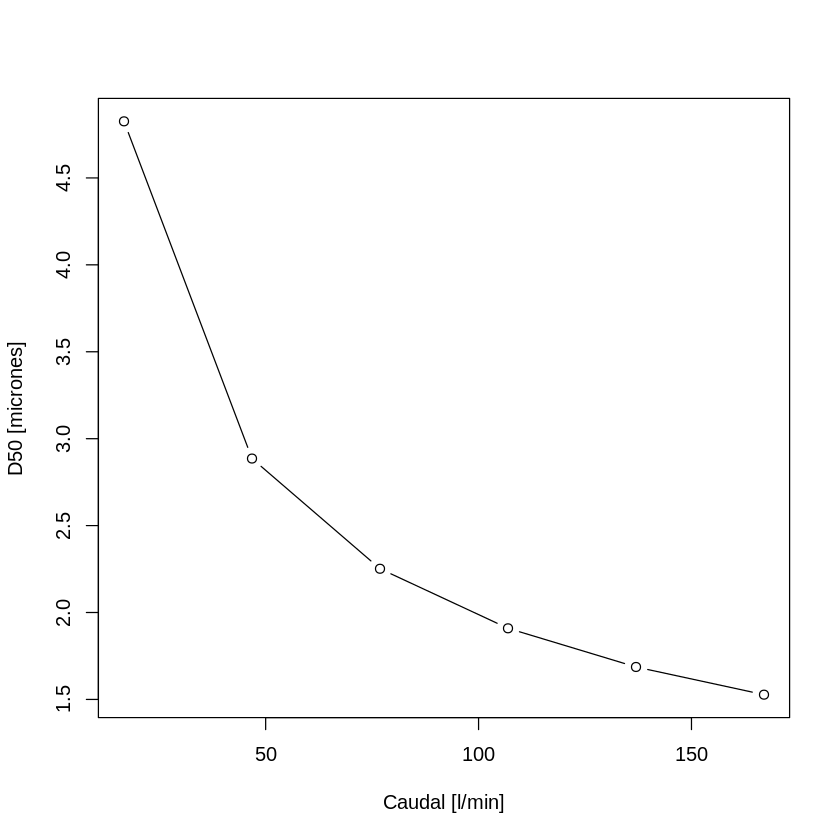

In [139]:

# Crear el gráfico inicial con la primera línea
plot(Dp*1000000,res[,2]*100, type = "l", xlab="Diámetro de Partícula [micrones]", ylab="Eficiencia [%]")

# Agregar las líneas adicionales en el mismo gráfico
for (i in 3:ncol(res)) {
  lines(res[i] * 100, lty = i, col = i)
}
legend(20,80, c(flow), lty=c(1,3:ncol(res)), col=c(1,3:ncol(res)), title = "Caudal [l/min]")

plot(Q/0.000016667, D50*1000000, xlab="Caudal [l/min]", ylab = "D50 [micrones]", type="b")



# Tiempo estimado para recolectar material

In [ ]:
# 1) TSP: MP sedimentable total (rangos 50-100 micrones)
# suponemos una concentración media de 100 microgramos/m3 de TSP y eficiencia 100%
C<-100
MasaTSP<-Q*C*86400/100000 # masa diaria recolectada en gramos
print(paste("Potencial masa de TSP a recuperar[g/día]:",MasaTSP))
print(paste("Potencial masa de TSP en 30 días [g]:",MasaTSP*30))

[1] "Potencial masa de TSP a recuperar[g/día]: 0.02405808"
[2] "Potencial masa de TSP a recuperar[g/día]: 0.06725808"
[3] "Potencial masa de TSP a recuperar[g/día]: 0.11045808"
[4] "Potencial masa de TSP a recuperar[g/día]: 0.15365808"
[5] "Potencial masa de TSP a recuperar[g/día]: 0.19685808"
[6] "Potencial masa de TSP a recuperar[g/día]: 0.24005808"
[1] "Potencial masa de TSP en 30 días [g]: 0.7217424"
[2] "Potencial masa de TSP en 30 días [g]: 2.0177424"
[3] "Potencial masa de TSP en 30 días [g]: 3.3137424"
[4] "Potencial masa de TSP en 30 días [g]: 4.6097424"
[5] "Potencial masa de TSP en 30 días [g]: 5.9057424"
[6] "Potencial masa de TSP en 30 días [g]: 7.2017424"


In [ ]:
# 2) MP10: valores de referencia para Tandil tomados de Sosa et al 2017
C_10<-25
Ti_10<-(rop*0.00001**2)/(18*0.0000174)
E_10<-1-exp(-2*(G*Ti_10*Q*(n+1)/Dc**3)**(0.5/(n+1)))
print(paste("Eficiencia de colección MP10:",E_10))
Masa_10<-Q*C_10*86400/100000
print(paste("Potencial masa de MP10 a recuperar[g/día]:",Masa_10))
print(paste("Potencial masa de MP10 en 30 días [g]:",Masa_10*30))

[1] "Eficiencia de colección MP10: 0.850041101610367"
[2] "Eficiencia de colección MP10: 0.933264378309637"
[3] "Eficiencia de colección MP10: 0.95978051339639" 
[4] "Eficiencia de colección MP10: 0.972725277340244"
[5] "Eficiencia de colección MP10: 0.980235022504702"
[6] "Eficiencia de colección MP10: 0.985040051902008"
[1] "Potencial masa de MP10 a recuperar[g/día]: 0.00601452"
[2] "Potencial masa de MP10 a recuperar[g/día]: 0.01681452"
[3] "Potencial masa de MP10 a recuperar[g/día]: 0.02761452"
[4] "Potencial masa de MP10 a recuperar[g/día]: 0.03841452"
[5] "Potencial masa de MP10 a recuperar[g/día]: 0.04921452"
[6] "Potencial masa de MP10 a recuperar[g/día]: 0.06001452"
[1] "Potencial masa de MP10 en 30 días [g]: 0.1804356"
[2] "Potencial masa de MP10 en 30 días [g]: 0.5044356"
[3] "Potencial masa de MP10 en 30 días [g]: 0.8284356"
[4] "Potencial masa de MP10 en 30 días [g]: 1.1524356"
[5] "Potencial masa de MP10 en 30 días [g]: 1.4764356"
[6] "Potencial masa de MP10 en 30 días [g

In [ ]:
# 3) MP2.5: valores de referencia para Tandil tomados de Sosa et al 2017
C_25<-10
Ti_25<-(rop*0.0000025**2)/(18*0.0000174)
E_25<-1-exp(-2*(G*Ti_25*Q*(n+1)/Dc**3)**(0.5/(n+1)))
print(paste("Eficiencia de colección MP2.5:",E_25))
Masa_25<-Q*C_25*86400/100000
print(paste("Potencial masa de MP2.5 a recuperar[g/día]:",Masa_25))
print(paste("Potencial masa de MP2.5 en 30 días [g]:",Masa_25*30))

[1] "Eficiencia de colección MP2.5: 0.516968391002238"
[2] "Eficiencia de colección MP2.5: 0.645898965315681"
[3] "Eficiencia de colección MP2.5: 0.70840182347936" 
[4] "Eficiencia de colección MP2.5: 0.748756125383052"
[5] "Eficiencia de colección MP2.5: 0.777947346579181"
[6] "Eficiencia de colección MP2.5: 0.80044437408748" 
[1] "Potencial masa de MP2.5 a recuperar[g/día]: 0.002405808"
[2] "Potencial masa de MP2.5 a recuperar[g/día]: 0.006725808"
[3] "Potencial masa de MP2.5 a recuperar[g/día]: 0.011045808"
[4] "Potencial masa de MP2.5 a recuperar[g/día]: 0.015365808"
[5] "Potencial masa de MP2.5 a recuperar[g/día]: 0.019685808"
[6] "Potencial masa de MP2.5 a recuperar[g/día]: 0.024005808"
[1] "Potencial masa de MP2.5 en 30 días [g]: 0.07217424"
[2] "Potencial masa de MP2.5 en 30 días [g]: 0.20177424"
[3] "Potencial masa de MP2.5 en 30 días [g]: 0.33137424"
[4] "Potencial masa de MP2.5 en 30 días [g]: 0.46097424"
[5] "Potencial masa de MP2.5 en 30 días [g]: 0.59057424"
[6] "Potencia